# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('preprocessed_data.csv')
dataset.head()

,px,pz,start_speed,spin_rate,spin_dir,break_angle,break_length,ax,ay,az,vx0,vy0,vz0,x,x0,y,pfx_x,pfx_z,nasty,pitch_type
0,-1.223000,1.524000,65.6,1744.371,47.167,-11.9,17.7,8.487000,16.046000,-40.042000,-0.541000,-96.252000,2.199000,163.62,-2.120000,197.63,9.120000,-8.530000,53.0,CU
1,0.530000,1.551000,91.7,2714.894,133.519,-45.0,5.2,18.184000,27.228000,-14.907000,-8.371000,-134.001000,-8.299000,96.80,2.394000,196.90,9.940000,9.400000,62.0,SI
2,-0.041000,2.361000,88.9,2199.320,125.820,-33.9,6.1,15.988000,28.190000,-20.635000,-8.223000,-130.064000,-2.850000,118.56,1.950000,175.03,9.370000,6.720000,25.0,FF
3,0.935475,1.789995,96.4,2149.828,185.565,5.5,2.8,-2.013185,32.499583,-11.518974,3.145773,-140.048139,-8.694935,81.34,-0.071676,190.48,-1.016652,10.430747,55.0,FF
4,0.140000,2.906000,93.5,2232.872,109.606,-35.1,6.5,19.809000,24.758000,-25.118000,-11.055000,-136.628000,-1.851000,111.66,2.866000,160.32,10.280000,3.620000,36.0,FT


In [3]:
# Import ependent Variable
X = dataset.iloc[:, 0:18].values

In [4]:
# Import Dependent Variable
#y = dataset.iloc[0:100000, 29].values
y = dataset.iloc[0:, 19].values

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#convert y into binary format
import keras
from keras.utils import to_categorical
y_binary = to_categorical(y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
Using TensorFlow backend.


# Split data into trainning set and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.25)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Importing the Keras libraries and packages
#import keras
import tensorflow as tf
from keras import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation


In [8]:
#Initilize ANN
classifier = Sequential()

#Add input layer and fitst hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform', input_dim = 18))


#Add second hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform'))

#Add second hidden layer
classifier.add(Dense(10, activation = tf.nn.softmax, kernel_initializer='uniform'))

#compiling ANN
#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [metrics.categorical_accuracy])
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 1200, validation_split=0.1)

#classifier.save("ANN_classifier_0727.h5")

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 64493 samples, validate on 7166 samples
Epoch 1/1200
64493/64493 [==============================] - 1s 21us/step - loss: 0.9772 - acc: 0.6570 - val_loss: 0.7118 - val_acc: 0.7142
Epoch 2/1200
64493/64493 [==============================] - 1s 19us/step - loss: 0.6971 - acc: 0.7251 - val_loss: 0.6856 - val_acc: 0.7208
Epoch 3/1200
64493/64493 [==============================] - 1s 20us/step - loss: 0.6798 - acc: 0.7304 - val_loss: 0.6753 - val_acc: 0.7237
Epoch 4/1200
64493/64493 [==============================] - 1s 19us/step - loss: 0.6730 - acc: 0.7328 - val_loss: 0.6727 - val_acc: 0.7259
Epoch 5/1200
64493/64493 [==============================] - 1s 19us/step - loss: 0.6674 - acc: 0.7352 - val_loss: 0.6645 - val_acc: 0.7254
Epoch 6/1200
64493/64493 [==============================] - 1s 19us/step - loss: 0.6619 - acc: 0.7365 - val_loss: 0.6615 - val_acc: 0.7294
Epoch 7/1200
64493/64493 [==============================] - 1s 19us/step - loss: 0.6577 - acc: 0.7372 - val_loss: 0.6

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.6)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.savetxt("cm.csv", cm, delimiter=",")

Confusion matrix, without normalization
[[2376    2   12   27    7   41    0    3   15   17]
 [ 445 1316    1    0    0    0   63    6    0  180]
 [ 386    0  478  104    0    1    1    0    1  278]
 [1033    3   79 7122    0  204    0    0   69   14]
 [ 321    5    1    6   21    6    0    0    2   12]
 [1136    0    1  289    1 1203    0    0  177    0]
 [ 195  179    2    0    0    0  106    0    0   71]
 [  12    5    0    0    0    0    0   77    0    1]
 [ 924    0    2  175    0  310    2    0  567    1]
 [ 763  110  172   27    0    1   26    2    0 2692]]


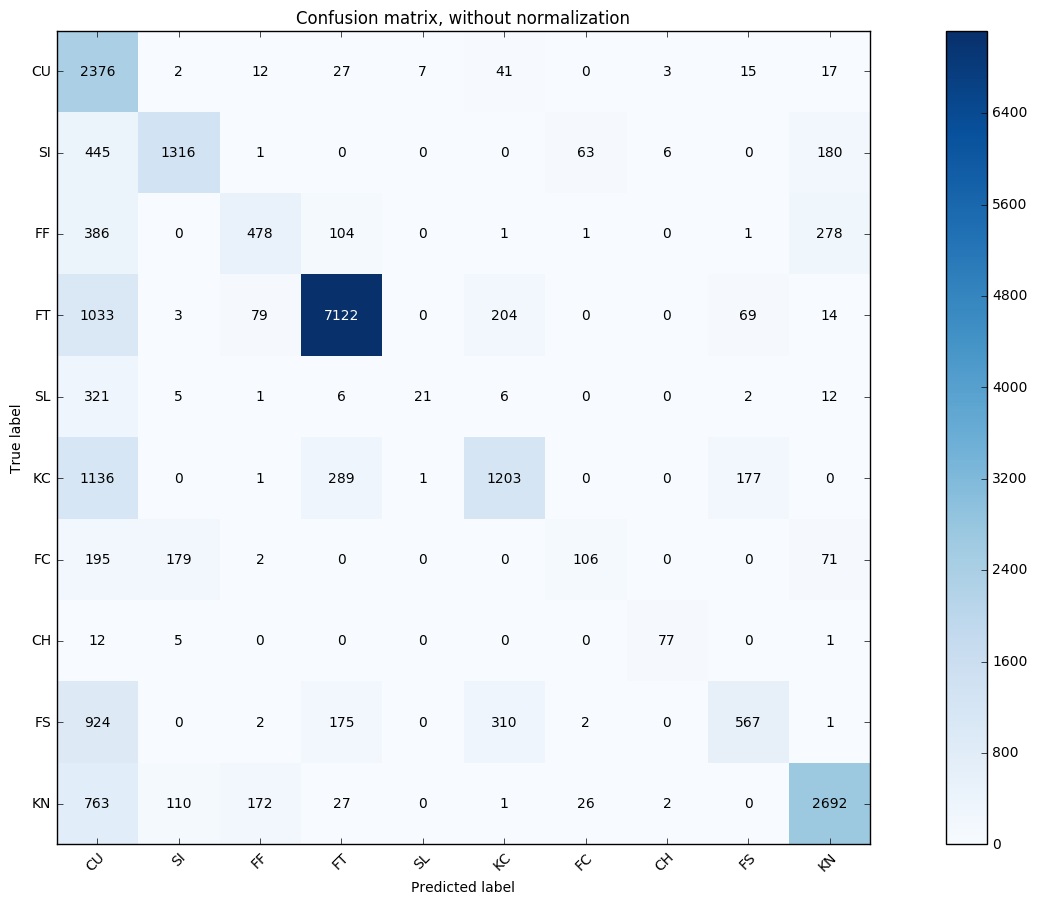

In [92]:
# Plot non-normalized confusion matrix
class_names = dataset['pitch_type'].unique()
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names,
                      title='Confusion matrix, without normalization')
#plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names, normalize=True,
#                     title='Normalized confusion matrix')
plt.show()

In [93]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print (class_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2500
           1       0.81      0.65      0.72      2011
           2       0.64      0.38      0.48      1249
           3       0.92      0.84      0.88      8524
           4       0.72      0.06      0.10       374
           5       0.68      0.43      0.53      2807
           6       0.54      0.19      0.28       553
           7       0.88      0.81      0.84        95
           8       0.68      0.29      0.40      1981
           9       0.82      0.71      0.76      3793

   micro avg       0.83      0.65      0.73     23887
   macro avg       0.75      0.52      0.58     23887
weighted avg       0.81      0.65      0.71     23887
 samples avg       0.65      0.65      0.65     23887



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


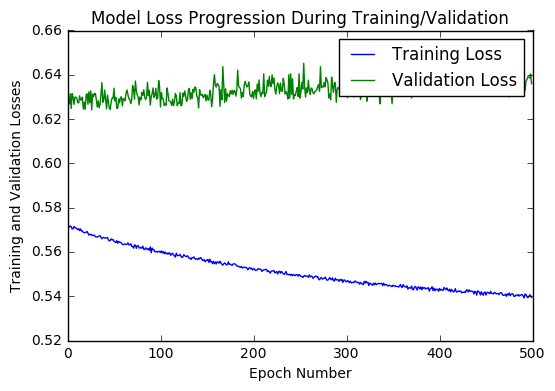

In [94]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

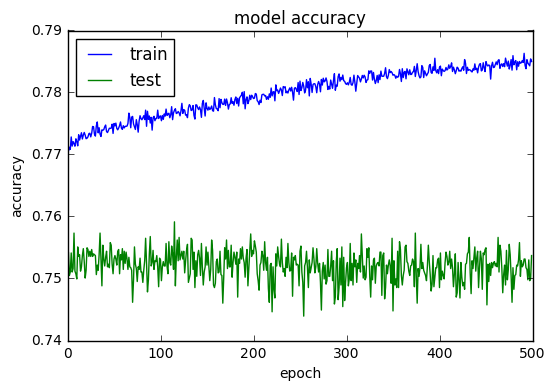

In [95]:
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

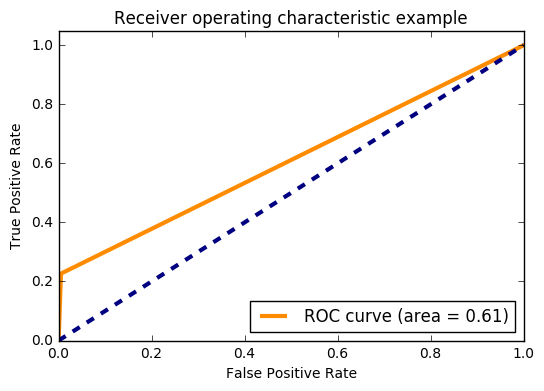

In [81]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 3
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



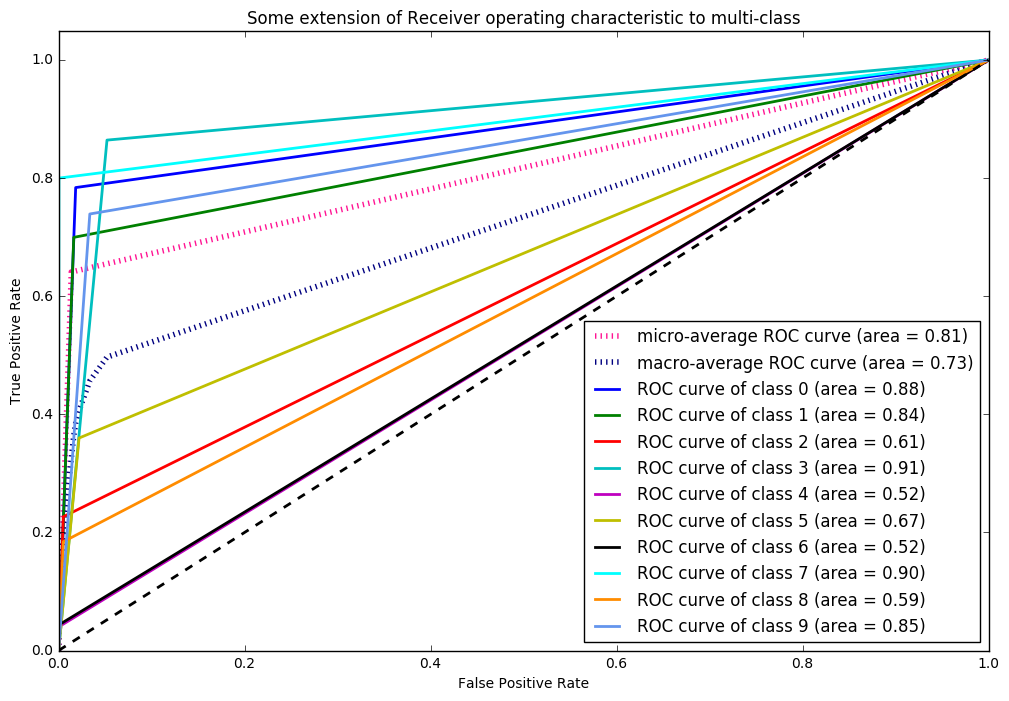

In [80]:
# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [39]:
# Compute micro-average ROC curve and ROC area
thresholds = dict()
fpr["micro"], tpr["micro"], thresholds["micro"] = metrics.roc_curve(y_test.ravel(), y_pred.ravel(),pos_label=2)
print(fpr)
print(tpr)
print(thresholds)

{0: array([ 0.        ,  0.02230327,  1.        ]), 1: array([ 0.        ,  0.01627354,  1.        ]), 2: array([ 0.        ,  0.01506317,  1.        ]), 3: array([ 0.        ,  0.05903795,  1.        ]), 4: array([ 0.        ,  0.00225407,  1.        ]), 5: array([ 0.        ,  0.03458254,  1.        ]), 6: array([ 0.        ,  0.00908545,  1.        ]), 7: array([  0.00000000e+00,   6.72494956e-04,   1.00000000e+00]), 8: array([ 0.        ,  0.02035972,  1.        ]), 9: array([ 0.        ,  0.04070867,  1.        ]), 'micro': array([ 0.        ,  0.08966802,  1.        ]), 'macro': array([  0.00000000e+00,   6.72494956e-04,   2.25407222e-03,
         9.08545470e-03,   1.50631681e-02,   1.62735418e-02,
         2.03597188e-02,   2.23032683e-02,   3.45825427e-02,
         4.07086693e-02,   5.90379483e-02,   1.00000000e+00])}
{0: array([ 0.    ,  0.8252,  1.    ]), 1: array([ 0.        ,  0.70760816,  1.        ]), 2: array([ 0.        ,  0.42033627,  1.        ]), 3: array([ 0.       

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [11]:
#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5)
    #fig.tight_layout()
    return ax